This notebook focuses on downstream analysis of the TP53 z-scores generated by previous files.

In [1]:
#importing packages
import pandas as pd
from poola import core as pool
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import gpplot as gpp
from itertools import product
from statannotations.Annotator import Annotator
from matplotlib.colors import ListedColormap 

gpp.set_aesthetics()

# Box and whisker mutation-specific plots

### ABE

In [2]:
ABE=pd.read_excel("../../required_data/TP53/ABE_presence_zscores.xlsx",sheet_name="Sheet1")
ABEsplice=pd.read_excel("../../required_data/TP53/ABE_activity_zscores.xlsx",sheet_name="Sheet1")

In [3]:
ABEsplice= ABEsplice[ABEsplice['Target Gene Symbol']=='TP53']
ABE= ABE[ABE['Target Gene Symbol']=='TP53']

ABE['Condition'] = 'Presence'
ABEsplice['Condition'] = 'Activity'

abe_all = pd.concat([ABE, ABEsplice], ignore_index=True)

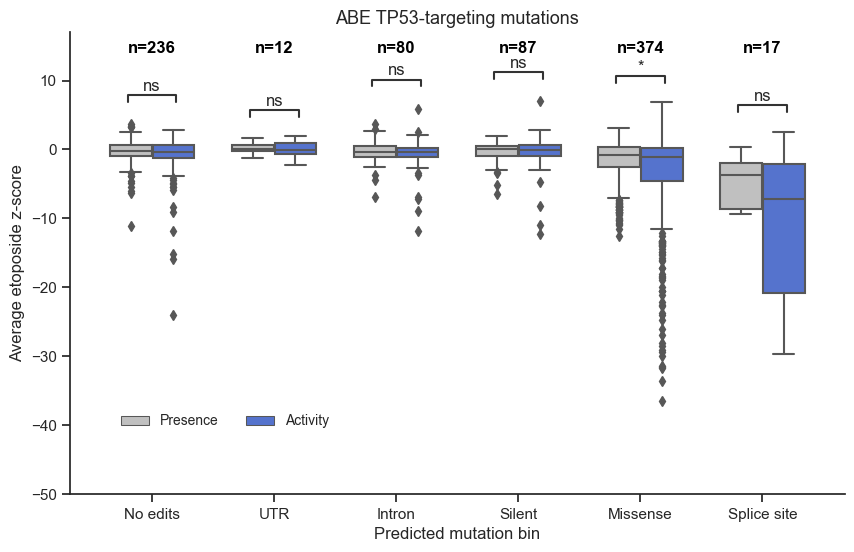

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'Presence': 'silver','Activity': 'royalblue'}
sns.boxplot(data=abe_all, x="Mutation bin", y="Eto_RepAB_D21;z-score", hue="Condition", width=0.7, 
            palette=colors, ax=ax, order=["No edits","UTR","Intron","Silent", "Missense","Splice site"])

#Show if difference in distributions is significant between activity, presence based selection 
pairs = [
    (("No edits", "Activity"), ("No edits", "Presence")),
    (("UTR", "Activity"), ("UTR", "Presence")),
    (("Intron", "Activity"), ("Intron", "Presence")),
    (("Silent", "Activity"), ("Silent", "Presence")),
    (("Missense", "Activity"), ("Missense", "Presence")),
    (("Splice site", "Activity"), ("Splice site", "Presence")),
]
annot = Annotator(ax, pairs, data=abe_all, x="Mutation bin", y="Eto_RepAB_D21;z-score", hue="Condition",order=["No edits","UTR","Intron","Silent", "Missense","Splice site"])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
annot.apply_test().annotate()

#report number of guides in each bin 
nobs = [str(x) for x in [int(len(abe_all[abe_all["Mutation bin"]=="No edits"])/2),
                         int(len(abe_all[abe_all["Mutation bin"]=="UTR"])/2),
                         int(len(abe_all[abe_all["Mutation bin"]=="Intron"])/2),
                         int(len(abe_all[abe_all["Mutation bin"]=="Silent"])/2),
                         int(len(abe_all[abe_all["Mutation bin"]=="Missense"])/2),
                         int(len(abe_all[abe_all["Mutation bin"]=="Splice site"])/2)]]
nobs = ["n=" + i for i in nobs]
pos = range(len(nobs))
ax.set_ylim([-50,17])
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],14,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='bold')

ax.set_title('ABE TP53-targeting mutations', fontsize=13)
ax.set_xlabel("Predicted mutation bin")
ax.set_ylabel("Average etoposide z-score")
sns.move_legend(
    ax, "upper left",bbox_to_anchor=(0.05,0.2), ncol=2, title=None, frameon=False,fontsize=10)

sns.despine()

### CBE

In [12]:
CBE=pd.read_excel("../../required_data/TP53/CBE_presence_zscores.xlsx",sheet_name="Sheet1")
CBEsplice=pd.read_excel("../../required_data/TP53/CBE_activity_zscores.xlsx",sheet_name="Sheet1")

In [13]:
#TP53-targeting only
CBEsplice= CBEsplice[CBEsplice['Target Gene Symbol']=='TP53']
CBE= CBE[CBE['Target Gene Symbol']=='TP53']

CBE['Condition'] = 'Presence'
CBEsplice['Condition'] = 'Activity'

cbe_all = pd.concat([CBE, CBEsplice], ignore_index=True)

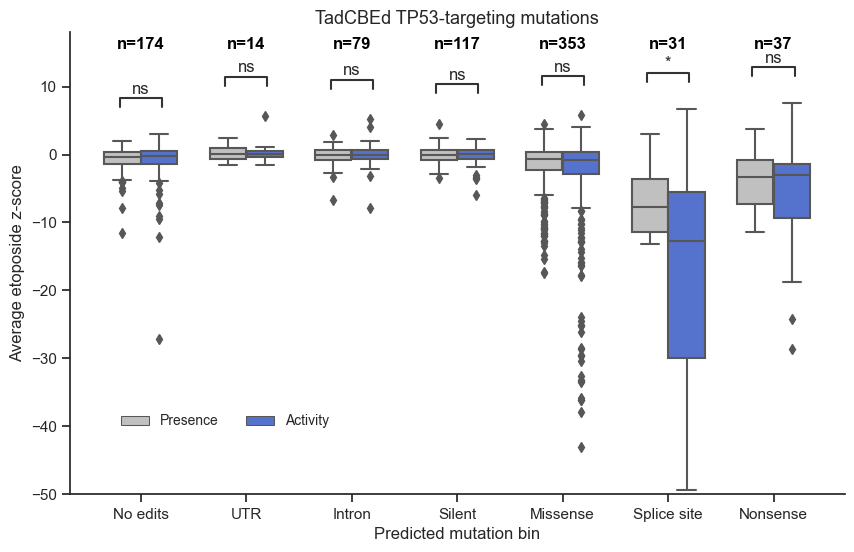

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'Presence': 'silver','Activity': 'royalblue'}
sns.boxplot(data=cbe_all, x="Mutation bin", y="Eto_RepAB_D21;z-score", hue="Condition", width=0.7, 
            palette=colors, ax=ax, order=["No edits","UTR","Intron","Silent", "Missense","Splice site","Nonsense"])

#Show if difference in distributions is significant between activity, presence based selection 
pairs = [
    (("No edits", "Activity"), ("No edits", "Presence")),
    (("UTR", "Activity"), ("UTR", "Presence")),
    (("Intron", "Activity"), ("Intron", "Presence")),
    (("Silent", "Activity"), ("Silent", "Presence")),
    (("Missense", "Activity"), ("Missense", "Presence")),
    (("Splice site", "Activity"), ("Splice site", "Presence")),
    (("Nonsense", "Activity"), ("Nonsense", "Presence"))
]
annot = Annotator(ax, pairs, data=cbe_all, x="Mutation bin", y="Eto_RepAB_D21;z-score", hue="Condition",order=["No edits","UTR","Intron","Silent", "Missense","Splice site","Nonsense"])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
annot.apply_test().annotate()

#report number of guides in each bin 
nobs = [str(x) for x in [int(len(cbe_all[cbe_all["Mutation bin"]=="No edits"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="UTR"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="Intron"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="Silent"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="Missense"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="Splice site"])/2),
                         int(len(cbe_all[cbe_all["Mutation bin"]=="Nonsense"])/2)
                        ]]
nobs = ["n=" + i for i in nobs]
pos = range(len(nobs))
ax.set_ylim([-50,18])
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],15.5,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='bold')

ax.set_title('TadCBEd TP53-targeting mutations', fontsize=13)
ax.set_xlabel("Predicted mutation bin")
ax.set_ylabel("Average etoposide z-score")
sns.move_legend(
    ax, "upper left",bbox_to_anchor=(0.05,0.2), ncol=2, title=None, frameon=False,fontsize=10)

sns.despine()

# Presence vs. activity scatterplots

In [89]:
abe_merged = pd.merge(ABE, ABEsplice, on='sgRNA Target Sequence', how='inner')

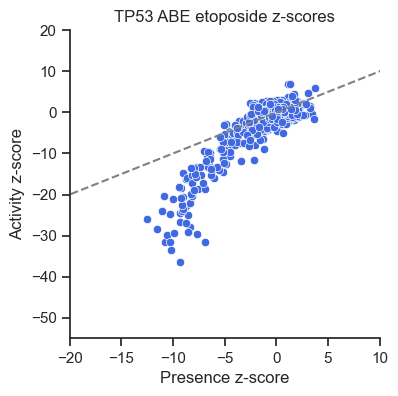

In [90]:
fig, ax = plt.subplots(figsize=(4,4))
a = sns.scatterplot(data=abe_merged, x="Eto_RepAB_D21;z-score_x", y="Eto_RepAB_D21;z-score_y", color='royalblue')
a.set_ylabel('Activity z-score')
a.set_xlabel('Presence z-score')
a.set_ylim([-55,25])

ax.plot([-50,20],[-50,20], color='gray', linestyle='--')
plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20])
plt.xticks([-20, -15, -10, -5, 0, 5, 10])
plt.ylim(-55, 20)
plt.xlim(-20, 10)
a.set_title('TP53 ABE etoposide z-scores', size=12)
sns.despine()

In [91]:
cbe_merged = pd.merge(CBE, CBEsplice, on='sgRNA Target Sequence', how='inner')

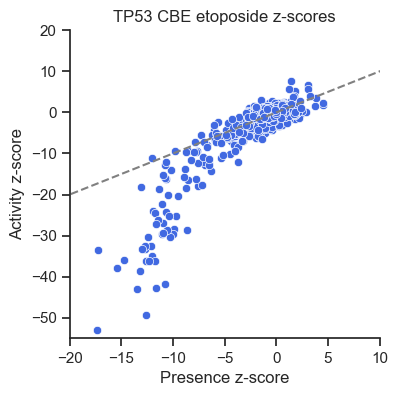

In [92]:
fig, ax = plt.subplots(figsize=(4,4))
a = sns.scatterplot(data=cbe_merged, x="Eto_RepAB_D21;z-score_x", y="Eto_RepAB_D21;z-score_y", color='royalblue')
a.set_ylabel('Activity z-score')
a.set_xlabel('Presence z-score')
a.set_ylim([-55,25])

ax.plot([-50,20],[-50,20], color='gray', linestyle='--')
plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20])
plt.xticks([-20, -15, -10, -5, 0, 5, 10])
plt.ylim(-55, 20)
plt.xlim(-20, 10)
a.set_title('TP53 CBE etoposide z-scores', size=12)
sns.despine()

In [93]:
cbe_merged['Eto_RepAB_D21;z-score_x'].corr(cbe_merged['Eto_RepAB_D21;z-score_y'])

np.float64(0.885927105714511)

In [94]:
abe_merged['Eto_RepAB_D21;z-score_x'].corr(abe_merged['Eto_RepAB_D21;z-score_y'])

np.float64(0.8762470718171201)

## Etoposide-arm replicate correlations pre vs. post-self editing correction

In [95]:
rep_corrs = pd.read_excel("../../required_data/TP53/TP53_BE_additional_info.xlsx", sheet_name='Etop')

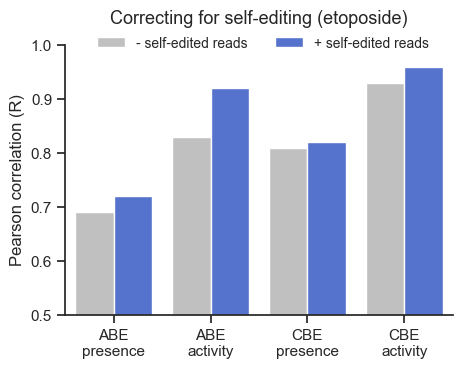

In [96]:
fig, ax = plt.subplots()
colors = {"- self-edited reads": 'silver', "+ self-edited reads": 'royalblue'}
ax = sns.barplot(data=rep_corrs, x="Condition", y="R", hue='Corrected', palette=colors)
ax.set_ylim(0.5, 1)
ax.set_xticks(ticks=[0,1,2,3],
               labels=["ABE\npresence", "ABE\nactivity", "CBE\npresence",
                       "CBE\nactivity"])
fig.set_size_inches(5, 3.5)
ax.set_ylabel("Pearson correlation (R)")
ax.legend(loc='upper left', title='')
ax.set_xlabel("")
ax.set_title("Correcting for self-editing (etoposide)", size=13, y=1.05)
sns.move_legend(
    ax, "upper left",bbox_to_anchor=(0.05,1.08), ncol=2, title=None, frameon=False,fontsize=10)
sns.despine()

## NGS deconvolution rate

In [97]:
deconvo = pd.read_excel("../../required_data/TP53/TP53_BE_additional_info.xlsx", sheet_name='Deconvolution')

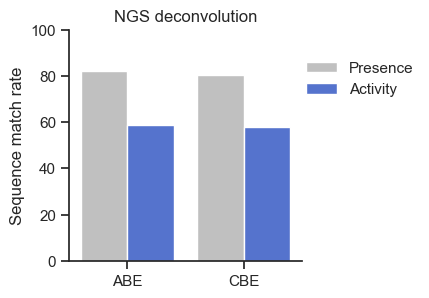

In [98]:
fig, ax = plt.subplots()

colors = {'Presence': 'silver', 'Activity':'royalblue'}

ax = sns.barplot(data=deconvo, x="Condition", y="Guide/barcode match", hue='Set', palette=colors)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[0,1],
               labels=["ABE", "CBE"])
fig.set_size_inches(3, 3)
ax.set_ylabel("Sequence match rate", fontsize=12)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(1.25, 0.65), ncol=1, title=None, frameon=False)

ax.set_xlabel("")
ax.set_title("NGS deconvolution", fontsize=12)
sns.despine()

# Domain scanning

In [99]:
def domain_scanning(domains, zscores):
    percents_list = []
    zscores = zscores[(zscores['Target Gene Symbol'] == 'TP53')]
    zscores = zscores[~zscores['Median Residues'].isna()].reset_index()
    for index, row in domains.iterrows():
        within_domain = zscores[(zscores['Median Residues'] >= row['Start']) & (zscores['Median Residues'] <= row['Stop'])]
        total_sgrna = len(within_domain)
        hits = sum(within_domain['Eto_RepAB_D21;z-score'].abs() > cutoff)
        percent = hits/total_sgrna*100
        percents_list.append(percent)
        
    return percents_list

In [100]:
domains = pd.read_excel('../../required_data/TP53/TP53_BE_additional_info.xlsx', sheet_name='Domains')

In [101]:
ABEpresence = pd.read_excel("../../required_data/TP53/ABE_presence_zscores.xlsx")
ABEactivity = pd.read_excel("../../required_data/TP53/ABE_activity_zscores.xlsx")
CBEpresence = pd.read_excel("../../required_data/TP53/CBE_presence_zscores.xlsx")
CBEactivity = pd.read_excel("../../required_data/TP53/CBE_activity_zscores.xlsx")

In [102]:
import matplotlib.patches as patches
def plot_domains(domains_df,length,start_col,end_col,label_col,block_type_col ):

    rectangle_params = (0, 0, length, 1)  # (x, y, width, height)
    fig, ax = plt.subplots(figsize=(10, 0.5))

    # Draw the main rectangle
    rectangle = patches.Rectangle(rectangle_params[:2], rectangle_params[2], rectangle_params[3], edgecolor='black', facecolor='none')
    ax.add_patch(rectangle)

    # Draw filled regions
    for i, r in domains_df.iterrows():
        start = r[start_col]
        end = r[end_col]
        label = r[label_col]
        block_type = r[block_type_col]
        if block_type == 'Domain':
            facecolor = 'aliceblue'
        else:
            facecolor = 'white'

        region = patches.Rectangle([start, 0], end - start, 1, edgecolor='black', facecolor=facecolor)
        ax.add_patch(region)
        #ax.text((start + end) / 2, 1.5, label, ha='center', va='center', color='black', fontsize=20)

    # Set axis limits
    ax.set_xlim([rectangle_params[0], rectangle_params[0] + rectangle_params[2]])
    ax.set_ylim([rectangle_params[1], rectangle_params[1] + rectangle_params[3]])

    # Remove x ticks
    ax.set_yticks([])

    # Display the plot
    return fig, ax

    # Display the plot
    return fig, ax

(array([  1,  61,  95, 292, 323, 356, 393]),
 [Text(1, 0, '1'),
  Text(61, 0, '61'),
  Text(95, 0, '95'),
  Text(292, 0, '292'),
  Text(323, 0, '323'),
  Text(356, 0, '356'),
  Text(393, 0, '393')])

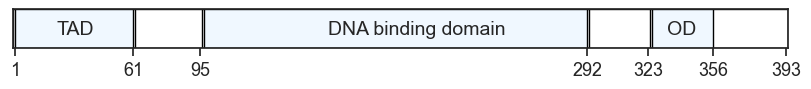

In [103]:
#Plot domains with z-scores
length = ABEpresence[ABEpresence['Target Gene Symbol']=='TP53']['Median Residues'].max()
start_col = 'Start'
end_col = 'Stop'
label_col = 'Section'
block_type_col = 'Classification'

fig, ax = plot_domains(domains,length,start_col,end_col,label_col,block_type_col )

plt.text(22,0.35, 'TAD', size=14)
plt.text(160,0.35, 'DNA binding domain', size=14)
plt.text(332.5,0.35, 'OD', size=14)

ax.set_yticks([])
ax.set_xticks([1, 61, 95, 292, 323, 356, 393])
plt.xticks(fontsize=13)

## BE vs. nuclease (WT-Cas9)

In [104]:
nuclease = pd.read_excel('../../required_data/TP53/nuclease_zscores.xlsx', index_col='Unnamed: 0')

In [105]:
ABEsplice_missense = ABEsplice[ABEsplice['Mutation bin']=='Missense']
CBEsplice_missense = CBEsplice[CBEsplice['Mutation bin']=='Missense']

ABE_missense = ABE[ABE['Mutation bin']=='Missense']
CBE_missense = CBE[CBE['Mutation bin']=='Missense']

In [106]:
meta_info = pd.read_csv('../../required_data/TP53/TP53_tiling_NNNN.txt', delimiter = "\t")
#meta_info.drop(meta_info[meta_info['Edit Type'] == 'C-T'].index, inplace=True)

nuclease_2 = pd.merge(meta_info, nuclease, on='sgRNA Target Sequence', how='inner')

In [107]:
#Fxn that gets amino acid residues to be plotted 
def GetResidues(string):
    new_string = ''
    if type(string) != float:
        edits = string.split(',')
        #split on comma for libraries designed with BEAGLE, split on semi-colon for libraries designed with Mudra's code
        for edit in edits:
            if edit.startswith('Exon'):
                new_string += 'intron;'
            elif edit == 'utr':
                new_string += 'utr;'
            elif edit == '':
                continue
            else:
                # Strip off all non-digit characters
                for character in edit:
                    if character.isdigit():        
                        new_string += character
                new_string += ';'
    return new_string

def GetMedianResidues(string):
    residues = string.split(';')
    if ('intron' in residues) or ('utr' in residues):
        return np.nan
    residues = [int(res) for res in residues if res != '']
    if len(residues) != 0:
        return np.median(residues)
    else:
        return np.nan

In [108]:
nuclease.loc[nuclease['Median Residues'] < 62, 'Domain'] = 'Domain'
nuclease.loc[(nuclease['Median Residues'] >= 62) & (nuclease['Median Residues'] < 96), 'Domain'] = 'Interdomain'
nuclease.loc[(nuclease['Median Residues'] >= 96) & (nuclease['Median Residues'] < 293), 'Domain'] = 'Domain'
nuclease.loc[(nuclease['Median Residues'] >= 293) & (nuclease['Median Residues'] < 324), 'Domain'] = 'Interdomain'
nuclease.loc[(nuclease['Median Residues'] >= 324) & (nuclease['Median Residues'] < 357), 'Domain'] = 'Domain'
nuclease.loc[nuclease['Median Residues'] >= 357, 'Domain'] = 'Interdomain'
nuclease['Domain'].value_counts()

Domain
Domain         358
Interdomain    108
Name: count, dtype: int64

In [109]:
ABE_missense.loc[ABE_missense['Median Residues'] < 62, 'Domain'] = 'Domain'
ABE_missense.loc[(ABE_missense['Median Residues'] >= 62) & (ABE_missense['Median Residues'] < 96), 'Domain'] = 'Interdomain'
ABE_missense.loc[(ABE_missense['Median Residues'] >= 96) & (ABE_missense['Median Residues'] < 293), 'Domain'] = 'Domain'
ABE_missense.loc[(ABE_missense['Median Residues'] >= 293) & (ABE_missense['Median Residues'] < 324), 'Domain'] = 'Interdomain'
ABE_missense.loc[(ABE_missense['Median Residues'] >= 324) & (ABE_missense['Median Residues'] < 357), 'Domain'] = 'Domain'
ABE_missense.loc[ABE_missense['Median Residues'] >= 357, 'Domain'] = 'Interdomain'
ABE_missense['Domain'].value_counts()

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/86855921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABE_missense.loc[ABE_missense['Median Residues'] < 62, 'Domain'] = 'Domain'


Domain
Domain         302
Interdomain     72
Name: count, dtype: int64

In [110]:
CBE_missense.loc[CBE_missense['Median Residues'] < 62, 'Domain'] = 'Domain'
CBE_missense.loc[(CBE_missense['Median Residues'] >= 62) & (CBE_missense['Median Residues'] < 96), 'Domain'] = 'Interdomain'
CBE_missense.loc[(CBE_missense['Median Residues'] >= 96) & (CBE_missense['Median Residues'] < 293), 'Domain'] = 'Domain'
CBE_missense.loc[(CBE_missense['Median Residues'] >= 293) & (CBE_missense['Median Residues'] < 324), 'Domain'] = 'Interdomain'
CBE_missense.loc[(CBE_missense['Median Residues'] >= 324) & (CBE_missense['Median Residues'] < 357), 'Domain'] = 'Domain'
CBE_missense.loc[CBE_missense['Median Residues'] >= 357, 'Domain'] = 'Interdomain'
CBE_missense['Domain'].value_counts()

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/830486171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBE_missense.loc[CBE_missense['Median Residues'] < 62, 'Domain'] = 'Domain'


Domain
Domain         258
Interdomain     96
Name: count, dtype: int64

In [111]:
ABEsplice_missense.loc[ABEsplice_missense['Median Residues'] < 62, 'Domain'] = 'Domain'
ABEsplice_missense.loc[(ABEsplice_missense['Median Residues'] >= 62) & (ABEsplice_missense['Median Residues'] < 96), 'Domain'] = 'Interdomain'
ABEsplice_missense.loc[(ABEsplice_missense['Median Residues'] >= 96) & (ABEsplice_missense['Median Residues'] < 293), 'Domain'] = 'Domain'
ABEsplice_missense.loc[(ABEsplice_missense['Median Residues'] >= 293) & (ABEsplice_missense['Median Residues'] < 324), 'Domain'] = 'Interdomain'
ABEsplice_missense.loc[(ABEsplice_missense['Median Residues'] >= 324) & (ABEsplice_missense['Median Residues'] < 357), 'Domain'] = 'Domain'
ABEsplice_missense.loc[ABEsplice_missense['Median Residues'] >= 357, 'Domain'] = 'Interdomain'
ABEsplice_missense['Domain'].value_counts()

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/4027279034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABEsplice_missense.loc[ABEsplice_missense['Median Residues'] < 62, 'Domain'] = 'Domain'


Domain
Domain         302
Interdomain     72
Name: count, dtype: int64

In [112]:
CBEsplice_missense.loc[CBEsplice_missense['Median Residues'] < 62, 'Domain'] = 'Domain'
CBEsplice_missense.loc[(CBEsplice_missense['Median Residues'] >= 62) & (CBEsplice_missense['Median Residues'] < 96), 'Domain'] = 'Interdomain'
CBEsplice_missense.loc[(CBEsplice_missense['Median Residues'] >= 96) & (CBEsplice_missense['Median Residues'] < 293), 'Domain'] = 'Domain'
CBEsplice_missense.loc[(CBEsplice_missense['Median Residues'] >= 293) & (CBEsplice_missense['Median Residues'] < 324), 'Domain'] = 'Interdomain'
CBEsplice_missense.loc[(CBEsplice_missense['Median Residues'] >= 324) & (CBEsplice_missense['Median Residues'] < 357), 'Domain'] = 'Domain'
CBEsplice_missense.loc[CBEsplice_missense['Median Residues'] >= 357, 'Domain'] = 'Interdomain'
CBEsplice_missense['Domain'].value_counts()

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/2775200789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBEsplice_missense.loc[CBEsplice_missense['Median Residues'] < 62, 'Domain'] = 'Domain'


Domain
Domain         256
Interdomain     96
Name: count, dtype: int64

In [113]:
ABE_missense['condition'] = 'ABEpresence'
CBE_missense['condition'] = 'CBEpresence'
ABEsplice_missense['condition'] = 'ABEactivity'
CBEsplice_missense['condition'] = 'CBEactivity'
nuclease['condition'] = 'WT-Cas9'
nuclease = nuclease.drop_duplicates()

merge_all = pd.concat([ABE_missense, CBE_missense, nuclease, ABEsplice_missense, CBEsplice_missense], ignore_index=True)
merge_all['condition'].value_counts()

/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/2632125278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABE_missense['condition'] = 'ABEpresence'
/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/2632125278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBE_missense['condition'] = 'CBEpresence'
/var/folders/nm/6_wl7tx50tq5bqfp8vzf4m6r0000gq/T/ipykernel_35029/2632125278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

condition
WT-Cas9        967
ABEpresence    374
ABEactivity    374
CBEpresence    354
CBEactivity    352
Name: count, dtype: int64

In [114]:
merge_all_ABEactivity = merge_all[merge_all['condition']=='ABEactivity']
merge_all_CBEactivity = merge_all[merge_all['condition']=='CBEactivity']
merge_all_ABEpresence = merge_all[merge_all['condition']=='ABEpresence']
merge_all_CBEpresence = merge_all[merge_all['condition']=='CBEpresence']
merge_all_nuclease = merge_all[merge_all['condition']=='WT-Cas9']

In [115]:
#print(merge_all_nuclease[merge_all_nuclease['Domain']=='Domain']["Strongest Z-score"].mean())
mean_1 = merge_all_ABEpresence[merge_all_ABEpresence['Domain']=='Domain']["Eto_RepAB_D21;z-score"].mean()
mean_2 = merge_all_ABEpresence[merge_all_ABEpresence['Domain']=='Interdomain']["Eto_RepAB_D21;z-score"].mean()

mean_3 = merge_all_CBEpresence[merge_all_CBEpresence['Domain']=='Domain']["Eto_RepAB_D21;z-score"].mean()
mean_4 = merge_all_CBEpresence[merge_all_CBEpresence['Domain']=='Interdomain']["Eto_RepAB_D21;z-score"].mean()

mean_5 = merge_all_ABEactivity[merge_all_ABEactivity['Domain']=='Domain']["Eto_RepAB_D21;z-score"].mean()
mean_6 = merge_all_ABEactivity[merge_all_ABEactivity['Domain']=='Interdomain']["Eto_RepAB_D21;z-score"].mean()

mean_7 = merge_all_CBEactivity[merge_all_CBEactivity['Domain']=='Domain']["Eto_RepAB_D21;z-score"].mean()
mean_8 = merge_all_CBEactivity[merge_all_CBEactivity['Domain']=='Interdomain']["Eto_RepAB_D21;z-score"].mean()

mean_9 = merge_all_nuclease[merge_all_nuclease['Domain']=='Domain']["Eto_RepAB_D21;z-score"].mean()
mean_10 = merge_all_nuclease[merge_all_nuclease['Domain']=='Interdomain']["Eto_RepAB_D21;z-score"].mean()

abe_presence_diff = mean_1 - mean_2
cbe_presence_diff = mean_3 - mean_4
abe_activity_diff = mean_5 - mean_6
cbe_activity_diff = mean_7 - mean_8
nuclease_diff = mean_9 - mean_10

Text(3.8, 9, '∆=2.83')

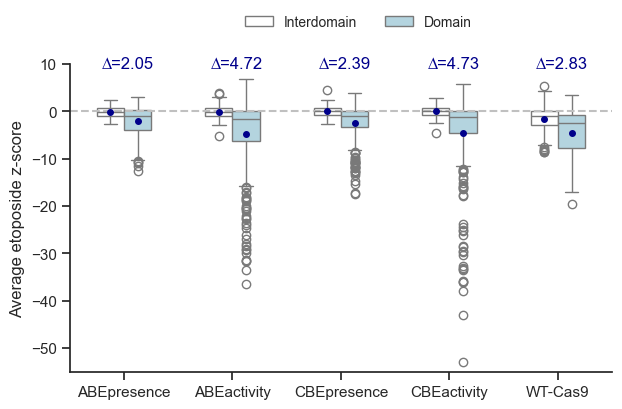

In [116]:
colors = {'Domain': 'lightblue','Interdomain': 'white'}

fig, ax = plt.subplots(figsize=(7, 4))
gpp.set_aesthetics()

#ax = sns.boxplot(data=merge_all, x="condition", y="Strongest Z-score", hue="Domain", width=0.5, palette=colors,
                 #order=["ABEpresence", 'ABE', 'CBEpresence', 'CBE', 'WT-Cas9'],showmeans=True)
    
ax = sns.boxplot(
    data=merge_all,
    x="condition",
    y="Eto_RepAB_D21;z-score",
    hue="Domain",
    width=0.5,
    palette=colors,
    order=["ABEpresence", 'ABEactivity', 'CBEpresence', 'CBEactivity', 'WT-Cas9'],
    showmeans=True, 
    meanprops={"marker": ".","markeredgecolor": "darkblue",'markerfacecolor':'darkblue',"markersize": "8"})

sns.move_legend(
    ax, "upper left",bbox_to_anchor=(0.3,1.2), ncol=3, title=None, frameon=False,fontsize=10)
sns.despine()
ax.set_ylim(-55, 10)
ax.axhline(y=0, color='silver', linestyle='--')

#ax.set_title('Domaing scanning by technology', fontsize=13, y=1.2)
plt.xlabel("")
plt.ylabel("Average etoposide z-score")


plt.text(-0.2, 9, f"∆={abs(abe_presence_diff):.2f}", fontsize=12, color='darkblue')
plt.text(0.8, 9, f"∆={abs(abe_activity_diff):.2f}", fontsize=12, color='darkblue')
plt.text(1.8, 9, f"∆={abs(cbe_presence_diff):.2f}", fontsize=12, color='darkblue')
plt.text(2.8, 9, f"∆={abs(cbe_activity_diff):.2f}", fontsize=12, color='darkblue')
plt.text(3.8, 9, f"∆={abs(nuclease_diff):.2f}", fontsize=12, color='darkblue')